In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import shap

from sklearn.model_selection import GridSearchCV, StratifiedKFold

shap.initjs()

In [2]:
# PATHS
DATA_PATH = r'../Data/pacientes_ucic_xgb.csv'

# VARIABLES
SCORING = 'f1'
CV = 5
RANDOM_STATE = 11
N_JOBS = -1

In [3]:
# DATA
df = pd.read_csv(DATA_PATH)
df.head()

,Edad,Talla,Peso,SAPS-3,Tiempo de CEC,Tiempo de clampaje,Tiempo de isquemia,Tiempo de parada circulatoria,SEXO,cca_nyha_PF,...,Situación al alta de UCI.Ayuda movilización,Situación al alta de UCI.Estable no precisa cuidados especiales,Situación al alta de UCI.Precisa vigilancia herida quirúrgica,Situación al alta de UCI.Precisa telemetría,Situación al alta de UCI.Ayuda comer,Situación al alta de UCI.Vigilancia por delirio,Situación al alta de UCI.Vigilancia anemia/anticoagulantes,Situación al alta de UCI.Limitado esfuerzo terapéutico,Situación al alta de UCI.Cuidados especiales por vía aérea artificial,Situación al alta de UCI.Otro
0,83.095890,170.0,86.0,76.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,82.084932,169.0,83.0,47.0,145.0,108.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,51.216438,164.0,90.0,47.0,0.0,0.0,0.0,0.0,0.0,2.0,...,1,0,0,0,0,0,0,0,0,0
3,78.284932,153.0,80.0,45.0,105.0,92.0,0.0,0.0,1.0,2.0,...,0,1,0,0,0,0,0,0,0,0
4,63.887671,165.0,75.0,47.0,120.0,100.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# X / y columns
y_col = 'Situación al alta de UCI.Otro'
y_cols = [col for col in df.columns if 'Situación al alta' in col]
X_cols = df.drop(y_cols, axis=1).columns

In [5]:
# X / y
X = df[X_cols]
y = df[y_col]

In [6]:
PARAMS = {
    'max_depth': [2, 3],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [200, 300, 400],
    'scale_pos_weight': [y.value_counts()[1]/y.value_counts()[0], 1]
}

In [7]:
skf = StratifiedKFold(n_splits=CV,
                      random_state=RANDOM_STATE)

In [8]:
# BASE ESTIMATOR
clf = xgb.XGBClassifier(objective='binary:logistic', booster='gbtree', random_state=RANDOM_STATE, n_jobs=N_JOBS)

In [9]:
grid_search = GridSearchCV(estimator=clf,
                          param_grid=PARAMS,
                          scoring=SCORING,
                          cv=CV,
                          n_jobs=N_JOBS)
grid_search.fit(X, y)

/Users/diego/Documents/TFG/venvTFG/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3], 'learning_rate': [0.1, 0.01, 0.001], 'n_estimators': [200, 300, 400], 'scale_pos_weight': [0.07329842931937172, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [10]:
best_params = grid_search.best_params_
best_params

{'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 200,
 'scale_pos_weight': 1}

In [11]:
clf.set_params(**best_params)
clf.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 11,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

In [12]:
clf.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=11, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [13]:
explainer = shap.TreeExplainer(clf)

In [14]:
shap_values = explainer.shap_values(X)

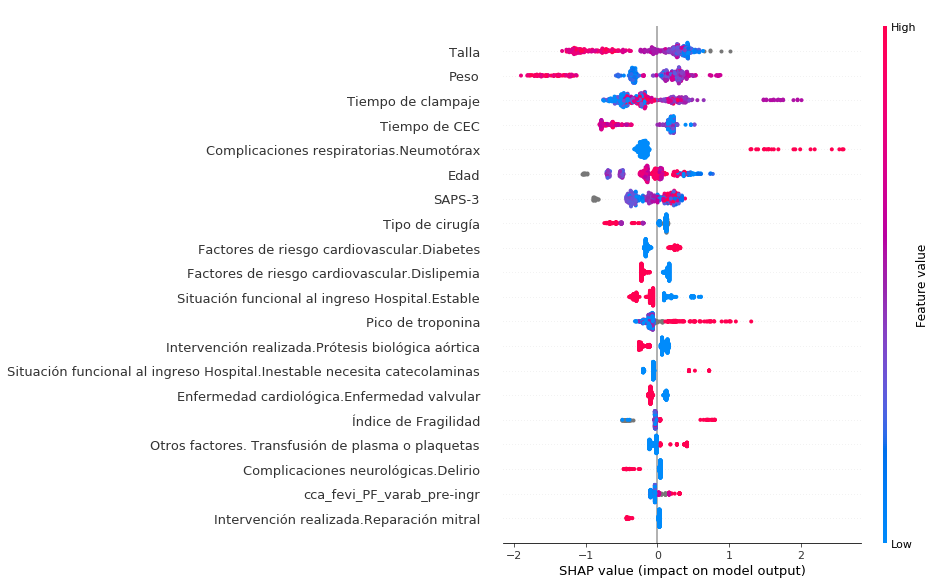

In [15]:
shap.summary_plot(shap_values, X)

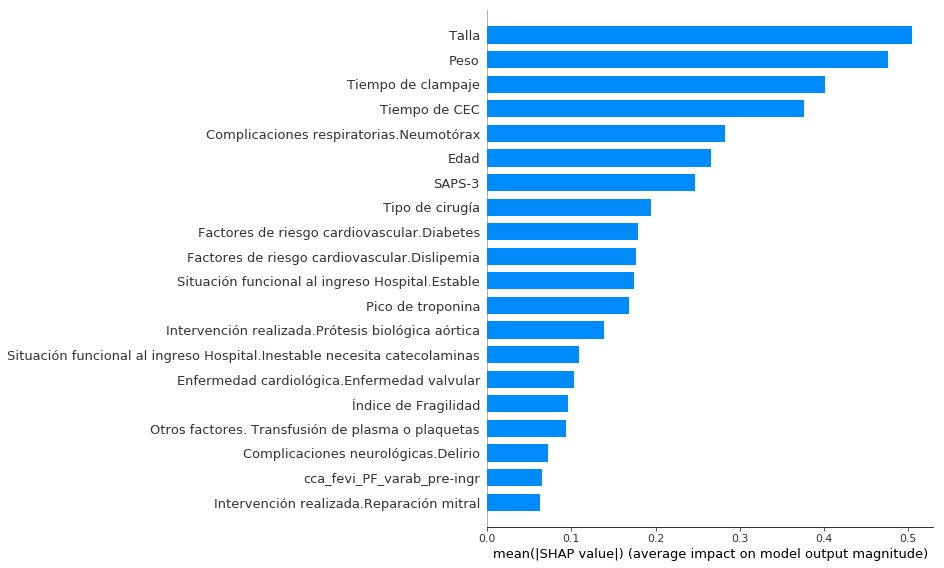

In [16]:
shap.summary_plot(shap_values, X, plot_type='bar')